# Final EDA and Modeling

In this trying times, now more than ever, retaining a customer base for a telecommuncations company and maintaining revenue it is of importance. The goal of this project is to help telecomunications companies predict customer churn and maintain revenue. 

With this goal, Telecom Custommer Churn Data was collected from IBM Business Analytics, with data of 7045 customers, all based in California. This data is from the third quarter of the year and contain features such as Churn Reason, Revenue, Total Charges, Type of Contract and more. 

## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from created_functions import remove_dups,reason_cleanup,to_binary
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

In [2]:
#loading dataframes
df1=pd.read_excel("EDA_&_Modeling/Telco_customer_churn.xlsx")
df2=pd.read_excel("EDA_&_Modeling/Telco_customer_churn_status.xlsx")
df3=pd.read_excel("EDA_&_Modeling/Telco_customer_churn_services.xlsx")
df4=pd.read_excel("EDA_&_Modeling/Telco_customer_churn_demographics.xlsx")

In [3]:
#Mergin dataframes into one
df1_2=pd.merge(df1, df2, left_on='CustomerID', right_on='Customer ID', how='left').drop('Customer ID', axis=1)
df3_4=pd.merge(df3, df4, left_on='Customer ID', right_on='Customer ID', how='left')
customer_df=pd.merge(df1_2, df3_4, left_on='CustomerID', right_on='Customer ID', how='left').drop('Customer ID', axis=1)

In [4]:
customer_df.head()

,CustomerID,Count_x_x,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender_x,Senior Citizen_x,Partner,Dependents_x,Tenure Months,Phone Service_x,Multiple Lines_x,Internet Service_x,Online Security_x,Online Backup_x,Device Protection,Tech Support,Streaming TV_x,Streaming Movies_x,Contract_x,Paperless Billing_x,Payment Method_x,Monthly Charges,Total Charges_x,Churn Label_x,Churn Value_x,Churn Score_x,CLTV_x,Churn Reason_x,Count_y_x,Quarter_x,Satisfaction Score,Customer Status,Churn Label_y,Churn Value_y,Churn Score_y,CLTV_y,Churn Category,Churn Reason_y,Count_x_y,Quarter_y,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service_y,Avg Monthly Long Distance Charges,Multiple Lines_y,Internet Service_y,Internet Type,Avg Monthly GB Download,Online Security_y,Online Backup_y,Device Protection Plan,Premium Tech Support,Streaming TV_y,Streaming Movies_y,Streaming Music,Unlimited Data,Contract_y,Paperless Billing_y,Payment Method_y,Monthly Charge,Total Charges_y,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Count_y_y,Gender_y,Age,Under 30,Senior Citizen_y,Married,Dependents_y,Number of Dependents
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,1,Q3,1,Churned,Yes,1,86,3239,Competitor,Competitor made better offer,1,Q3,No,0,2,None,Yes,10.47,No,Yes,DSL,21,Yes,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,53.85,108.15,0.0,0,20.94,129.09,1,Male,37,No,No,No,No,0
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,1,Q3,2,Churned,Yes,1,67,2701,Other,Moved,1,Q3,No,0,2,None,Yes,9.12,No,Yes,Fiber Optic,51,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,70.70,151.65,0.0,0,18.24,169.89,1,Female,19,Yes,No,No,Yes,2
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved,1,Q3,3,Churned,Yes,1,86,5372,Other,Moved,1,Q3,No,0,8,None,Yes,12.15,Yes,Yes,Cable,26,No,No,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.65,820.50,0.0,0,97.20,917.70,1,Female,31,No,No,No,Yes,2
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,1,Q3,3,Churned,Yes,1,84,5003,Other,Moved,1,Q3,No,0,28,Offer C,Yes,4.89,Yes,Yes,Fiber Optic,47,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,104.80,3046.05,0.0,0,136.92,3182.97,1,Female,23,Yes,No,Yes,Yes,3
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices,1,Q3,1,Churned,Yes,1,89,5340,Competitor,Competitor had better devices,1,Q3,No,0,49,None,Yes,44.33,Yes,Yes,Fiber Optic,11,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,103.70,5036.30,0.0,0,2172.17,7208.47,1,Male,38,No,No,No,Yes,1


The data that was utilized is the Telco customer churn database from IBM Business Analytics. 

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

In [5]:
#Cleaning up duplicates 
customer_df=customer_df.T.drop_duplicates().T
customer_df.columns=[column.lower().strip("_x").strip("_y").replace(" ","_")for column in customer_df.columns] 

In [6]:
#Removing duplicates that were not caught by the previous function.
remove_dup=["internet_service","online_securit","online_backup","multiple_lines","streaming_tv","payment_method","total_charges","contract","streaming_movies","churn_reason"]
remove_dups(remove_dup,customer_df)

In [7]:
#Dropping Redundant columns
customer_df.drop(["lat_long","customerid","churn_label","count","countr","state","quarter",],axis=1,inplace=True)

Text(0.5, 0, 'Churnned')

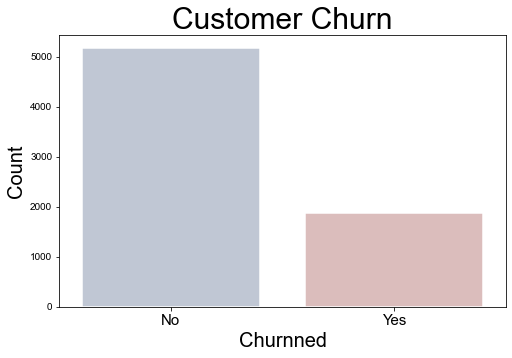

In [8]:
fig, ax = plt.subplots(figsize=(8,5))
a=customer_df["churn_value"].value_counts()
sns.set('talk')
ax=sns.barplot(x=a.index,y=a.values,palette="vlag",ci=None)
ax.set_xticklabels(["No","Yes"],rotation=0,fontsize=15)
ax.set_title("Customer Churn",fontsize=30)
ax.set_ylabel("Count",fontsize=20)
ax.set_xlabel("Churnned",fontsize=20)

Fist I started by looking at my target variable. I wanted to see what was the amount of customers that have churned and those who have not, or people who left the company and those who stayed. I wanted to see what was the class imbalance in the target variable. 


In [9]:
#Binning age 
customer_df.age=pd.cut(x=customer_df['age'], bins=[10,20,30,40, 50,60,70,80], labels=["10","20","30","40", "50","60","70"])

Text(0, 0.5, 'Customers')

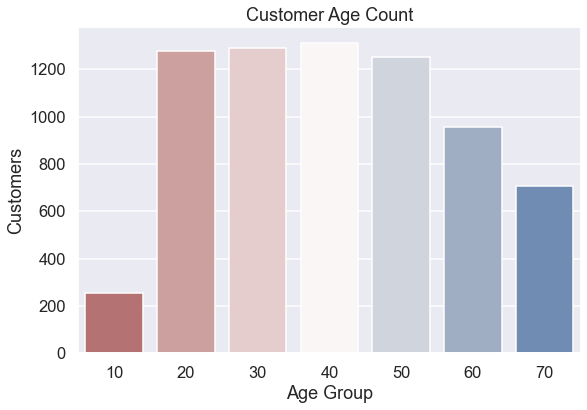

In [10]:
#Plotting each customer age group to get an idea of how many customers there are in each group.
a=pd.melt(customer_df[["age","latitude"]].groupby("age").count().T)
fig, ax = plt.subplots(figsize=(9,6))
ax=sns.barplot(a.age,a.value,palette="vlag_r")
ax.set_title("Customer Age Count")
ax.set_xlabel("Age Group")
ax.set_ylabel("Customers")

Next I wanted to get a sense of the customer base, this would give me the indication of what kind of customers we were looking at. The majority of customers seems to be between the ages of 20 -50. Then I focused on how much each group churned. The numbers do keep consistent for each group. But it seems that the gap is much closer for the older demographic since the customers are far less in those categories.

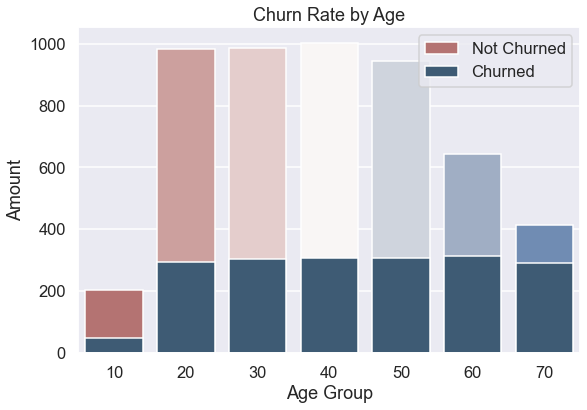

In [11]:
#Plotting a comparisonm between churned and stayed customers grouped by age.
fig, ax = plt.subplots(figsize=(9,6))
yes=pd.melt(customer_df[customer_df.churn_value==1][["churn_value","age","latitude"]].groupby(["age","churn_value"]).count().T)
no=pd.melt(customer_df[customer_df.churn_value==0][["churn_value","age","latitude"]].groupby(["age","churn_value"]).count().T)
ax=sns.barplot(no.age,no.value,palette="vlag_r",ci=None,label='No')
ax=sns.barplot(yes.age,yes.value,color="#355C7D",ci=None)
ax.set_xlabel("Age Group")
ax.set_ylabel("Amount")
ax.set_title("Churn Rate by Age")
ax.legend(["Not Churned","Churned"])

In [12]:
#Cleaning missing values from "total_charge" column
hold=[]
for x in customer_df.index:
    if type(customer_df.tel_total_charges[x])== str:
        hold.append(0)
    else:
        hold.append(customer_df.tel_total_charges[x])
customer_df.tel_total_chargs=hold
#Filling NA values for churn reason
customer_df.tel_churn_reason=customer_df.tel_churn_reason.fillna("No reason given")

After I wanted to focus on the revenue, since it is important for prepaid companies to maintain their customer base, and I found out that most of the higher revenue came from the older categories. This gives us the idea that since older customers maintain their older plans they tend to pay more. Followed by the older customers, the ages between 20 and 40 maintain a steady amount of revenue.

Text(0.5, 1.0, 'Revenue by Age')

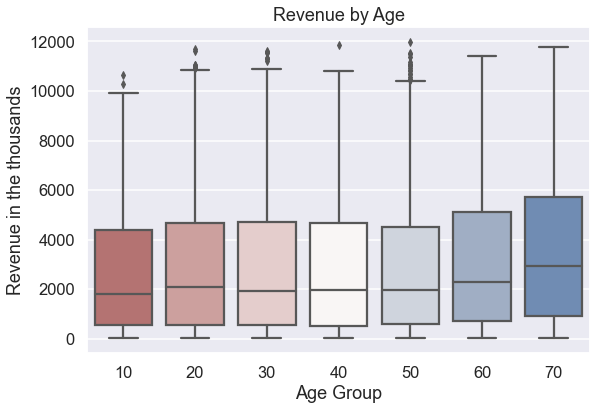

In [13]:
#Plotting how much revenue each age group generates.
fig, ax = plt.subplots(figsize=(9,6))
ax=sns.boxplot(customer_df.age,customer_df.total_revenue,palette="vlag_r")
ax.set_xlabel("Age Group")
ax.set_ylabel("Revenue in the thousands")
ax.set_title("Revenue by Age")

In [14]:
# Reclassifying nan values from Churn Category.
conditions=[
    (customer_df["churn_categor"].isna())& (customer_df["churn_value"]==0),            
    (customer_df["churn_categor"].isna())& (customer_df["churn_value"]==1),
]
choises=[
    "Not Churned",
    "No Reason",

]
customer_df.churn_categor=np.select(conditions,choises,default=customer_df.churn_categor)

In [15]:
# Re categorizing the churn reason for better interpretation.
customer_df["tel_churn_reason"]=reason_cleanup("tel_churn_reason",customer_df)

Text(0.5, 1.0, 'Revenue Loss')

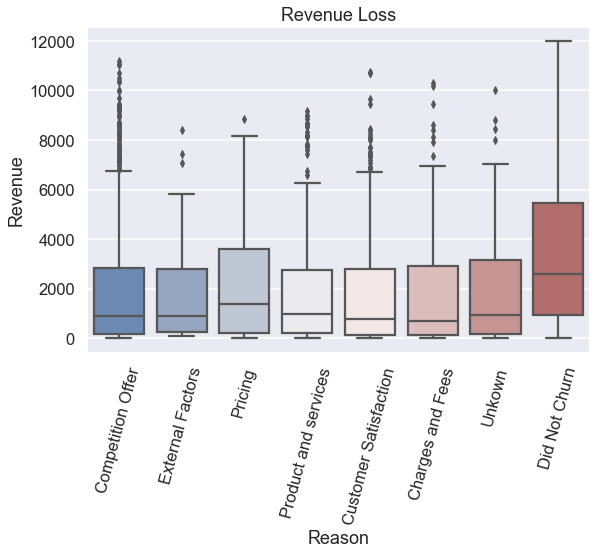

In [16]:
# Plotting the revenue that was lost from the customers that left and why they left. 
fig, ax = plt.subplots(figsize=(9,6))
ax=sns.boxplot(x=customer_df.tel_churn_reason,y=customer_df.total_revenue,palette="vlag")
sns.set('talk')
ax.set_xticklabels(["Competition Offer","External Factors","Pricing","Product and services","Customer Satisfaction","Charges and Fees","Unkown","Did Not Churn"],rotation=75)
ax.set_xlabel("Reason")
ax.set_ylabel("Revenue")
ax.set_title("Revenue Loss")

Following the revenue, I wanted to look at the potential revenue lost by those who left. I decided to look at how much each category, based on their reason of leaving, project the most loss for the company. And what stood out is that customers who had issues with pricing of the services had brought the most income to the company and seems that they were unhappy with how much they were paying, since they were the ones who stood out the most aside from the ones who left for a better offer, which we could assume since they have the least revenue lost, are more frugal and look for the best bargains.

In [17]:
#converting columns into binary
col_to_bin=["senior_citizen","partner","dependents","phone_service","device_protection","tech_support","paperless_billing","referred_a_friend","device_protection_plan","premium_tech_support","streaming_music","unlimited_data","under_30","tel_internet_service","tel_online_securit","tel_online_backup","tel_multiple_lines","tel_streaming_tv","tel_streaming_movies"]
for x in col_to_bin:
    to_binary(x,customer_df)

In [18]:
customer_df.drop(["tel_churn_reason","churn_categor","customer_status"],axis=1, inplace=True)

In [19]:
customer_df=pd.get_dummies(customer_df,columns=["cit","zip_code","latitude","longitude","gender","offer","internet_type","age","tel_payment_method","tel_contract"],drop_first=True)

In [20]:
customer_df=customer_df.astype("float")

# Modeling

Following the EDA I wanted to create a model that could help prevent the customer loss and revenue loss. 

I wanted to focus on Accuracy since we want to make sure that the model is able to look at the data and predict with great accuracy a customer that might churn. I also looked at F1 for overall model performance and lastly Recall since I still wanted to minimize the total False Positives that might arise and further prevent company's assets being focused on customers who are not going to churn. 

### Vanilla Model

For a Vanilla model, I want to explore a linear regression model. Since a Linear regression is the most basic and simple model to run without any parameter tuning, it can help me get an idea of what features are important using their coefficients. 

In [21]:
#Splitting the data into X and Y
y=customer_df["churn_value"]
X=customer_df[customer_df.columns[customer_df.columns!="churn_value"]]

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2020, test_size=0.2)

In [23]:
# Instantiating Logistic Regression with Max Iter of 10000 so the model can reach convergence
log_reg=LogisticRegression(max_iter=10000, random_state=40, class_weight="balanced")

In [24]:
log_reg.fit(X_train,y_train)

log_pred=log_reg.predict(X_test)

In [25]:
log_acc=metrics.recall_score(y_test, log_pred)
log_rec=metrics.accuracy_score(y_test, log_pred)
log_f1=metrics.f1_score(y_test,log_pred)

In [26]:
print('Logistic Regression Accuracy: {}'.format(log_acc))
print('Logistic Regression Recall: {}'.format(log_rec))
print('Logistic Regression F1: {}'.format(log_f1))

Logistic Regression Accuracy: 0.9770773638968482
Logistic Regression Recall: 0.9772888573456352
Logistic Regression F1: 0.9551820728291317


This model gave the best results as the baseline model. Accuracy does have room for improvement and it should be investigated forward using GridSearch. Model iterations can be found in the Modeling Notebook.

## Final Model

I want to compare both Ridge and Lasso as penalties to see if either one is better and RFE. Secondly, Using class weight balanced is used to see if it can bring more variance to the model. I also wanted to see if Warm Start could improve the CV process of the model.

In [27]:
#Choosing Parameter for the model.
params={
    "penalty":["l1","l2"],
    "class_weight":["balanced"],
    "max_iter":range(100,5000,100),
    "warm_start":["True","False"]   
}

In [28]:
# using vanilla Logistic Regression model and keeping the Random state for continuity and reproducibility
log_reg=LogisticRegression(random_state=40)
grid_lg=GridSearchCV(log_reg, params, cv=10, scoring="f1", verbose=1, n_jobs=-1)

In [29]:
grid_lg.fit(X_train,y_train)

Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 74.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 226.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 568.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 1152.9min
[Parallel(n_jobs=-1)]: Done 1960 out of 1960 | elapsed: 1396.1min finished


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=40), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_iter': range(100, 5000, 100),
                         'penalty': ['l1', 'l2'],
                         'warm_start': ['True', 'False']},
             scoring='f1', verbose=1)

In [30]:
print("Best Gridsearch Score: {}".format(grid_lg.best_score_))
print("Best Parameters: {}".format(grid_lg.best_params_))
print("Best Estimators: {}".format(grid_lg.best_estimator_))

Best Gridsearch Score: 0.9608549813367491
Best Parameters: {'class_weight': 'balanced', 'max_iter': 2400, 'penalty': 'l2', 'warm_start': 'True'}
Best Estimators: LogisticRegression(class_weight='balanced', max_iter=2400, random_state=40,
                   warm_start='True')


It seemed that Ridge was the best at keeping the relevant features for the model to perform optimally. It came as no surprise that balancing the class is the best way to have a model improve. 

In [31]:
gs_pred=grid_lg.best_estimator_.predict(X_test)

In [32]:
gs_acc=metrics.recall_score(y_test, gs_pred)
gs_rec=metrics.accuracy_score(y_test, gs_pred)
gs_f1=metrics.f1_score(y_test,gs_pred)

In [33]:
print('GridSearch Logistic Regression Accuracy: {}'.format(gs_acc))
print('GridSearch Logistic Regression Recall: {}'.format(gs_rec))
print('GridSearch Logistic Regression F1: {}'.format(gs_f1))

GridSearch Logistic Regression Accuracy: 0.9799426934097422
GridSearch Logistic Regression Recall: 0.9758694109297374
GridSearch Logistic Regression F1: 0.9526462395543175


# Final Results

Looking at the final results and interpreting them by looking at a confusion matrix to verify how good was the model at classifying each class and counting my True Positives and False Negatives. I also plotted the odds of the top and bottom coefficients for each feature to be in the positive class and negative class.

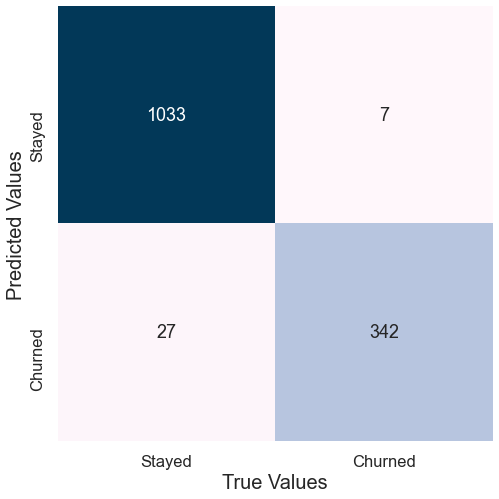

In [34]:
pred = confusion_matrix(y_test, gs_pred)
plt.figure(figsize=(8,8))

sns.heatmap(pred.T, square=True, annot=True, fmt='d',cmap="PuBu", cbar=False,
            xticklabels=['Stayed', 'Churned'], yticklabels=['Stayed', 'Churned'])
sns.set(font_scale=2)
plt.xlabel('True Values',fontsize=20)
plt.ylabel('Predicted Values',fontsize=20);


In [35]:
coef=pd.DataFrame(zip(X_train.columns, np.transpose(grid_lg.best_estimator_.coef_[0])), columns=['features', 'coef'])
coef.coef=[(np.exp(x))-1 for x in coef.coef]
coef=coef.iloc[coef.coef.sort_values().index]
coef=pd.concat([coef.iloc[:5],coef.iloc[-5:]]).reset_index(drop=True)

Finally I decided to take a look at the coefficients that came out of the GridSearch Logistic Regression model. Since Logistic Regression is calculating by taking using the formula: logit(p)=log(p1−p)=β0+β1x1+...+βxxx, I am able to calculate the odds of a feature being in the positive class by using e^coef-1 when the feature changes by one unit. This could give me an idea of which feature have higher odds on predicting the positive class and negative class.

[]

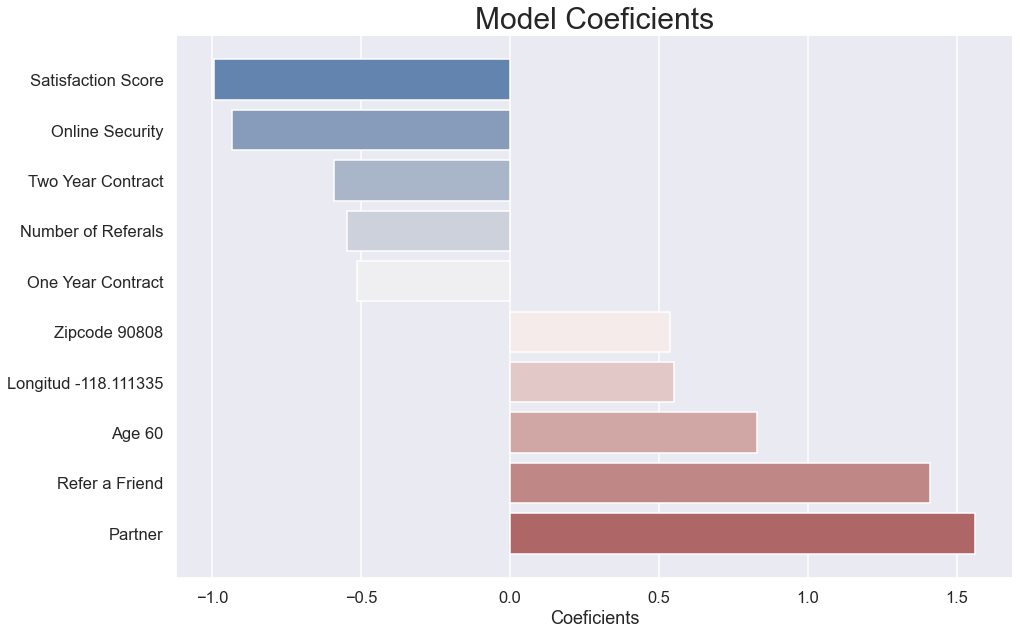

In [36]:
plt.figure(figsize=(15,10))
sns.set('talk')
ax=sns.barplot(x=coef.coef,y=coef.features,orient='h',palette="vlag",ci=None)
ax.set_xlabel('Coeficients')
ax.set_title('Model Coeficients',fontsize=30)
ax.set_ylabel("")
ax.set_yticklabels(["Satisfaction Score","Online Security","Two Year Contract","Number of Referals","One Year Contract","Zipcode 90808","Longitud -118.111335","Age 60","Refer a Friend","Partner"])
ax.plot()


Viewing at this graph we can see that Satisfaction Score and having a Contract tend to have higher odds on predicting the Negative class as opposed to being Partnered in the company and referring a Friend tend to have higher odds at predicting the positive class.

# Conclusions

In conclusion, in the EDA process, it didn't come as a surprise that customer satisfaction is a key factor in customer retention but what stood out is that, for this company, the majority of revenue loss is from customers who were unhappy with the pricing of services. Also, customers who went with a competitor's best offer could be investigated further to see which products and services is this Telecom company not offering that can be found in its competitors.

Using the each feature coefficients showed us that customers who are in contracts are less likely to churn as well as customers who are happy enough with the company and are willing to refer a friend could mean that they are less likely to churn.


# Further Steps

* Improving Model using: Adaboost, Gradient Boost & Clustering

* Improve Features using: Feature interactions & Polynomials

* Improve EDA by: Exploring Zipcodes, Explore Month to Month Contracts, Explore in depth all Revenue related columns.